In [1]:
# Exercise 7-1: Principle Component Analysis and K-Means Clustering
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.misc import imread

In [3]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example.
    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.
    centroids : ndarray, shape (K, n_features)
        The current centroids, where K is the number of centroids.
    Returns
    -------
    idx : ndarray, shape (n_samples, 1)
        Centroid assignments. idx[i] contains the index of the centroid closest to sample i.
    """
    m = X.shape[0]
    idx = np.zeros(m)
    for i in range(m):
        dist = np.sum(np.square(centroids - X[i, :]), axis=1)
        idx[i] = np.argmin(dist)

    return idx

In [7]:
# Load an example dataset that we will be using
mat_data = sio.loadmat('ex7/ex7data2.mat')
X = mat_data['X']

# Select an initial set of centroids
K = 3  # 3 Centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Find the closest centroids for the examples using the initial_centroids
idx = find_closest_centroids(X, initial_centroids)

print('Closest centroids for the first 3 examples: ')
print(idx[0:3])
print('(the closest centroids should be 0, 2, 1 respectively)')


Closest centroids for the first 3 examples: 
[0. 2. 1.]
(the closest centroids should be 0, 2, 1 respectively)


In [12]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the data points assigned to each centroid.
    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.
    idx : ndarray, shape(n_samples, 1)
        Centroid assignments.
    K : int
        The number of centroids.
    Returns
    -------
    centroids : ndarray, shape (K, n_features)
        New centroids, each row of which is the mean of the data points assigned to it.
    """
    m, n = X.shape
    centroids = np.zeros((K, n))

    for k in range(K):
        x = X[idx == k]
        #print(x)
        centroids[k, :] = np.mean(x, axis=0)

    return centroids

In [13]:
# Compute means based on the closest centroids found in the previous part.
centroids = compute_centroids(X, idx, K)

print('Centroids computed after initial finding of closest centroids:')
print(centroids)
print('(the centroids should be [ 2.428301 3.157924 ], [ 5.813503 2.633656 ], [ 7.119387 3.616684 ])')

Centroids computed after initial finding of closest centroids:
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
(the centroids should be [ 2.428301 3.157924 ], [ 5.813503 2.633656 ], [ 7.119387 3.616684 ])


In [15]:
def run_k_means(X, initial_centroids, max_iters, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X.
    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Training vectors, where n_samples is the number of samples and n_features is the number of features.
    initial_centroids : ndarray, shape (K, n_features)
        The initial centroids.
    max_iters : int
        Total number of iteration for K-Means to execute.
    plot_progress : bool
        True to plot progress for each iteration.
    Returns
    -------
    centroids : ndarray, shape (K, n_features)
        The final centroids.
    idx : ndarray, shape (n_samples, 1)
        Centroid assignments. idx[i] contains the index of the centroid closest to sample i.
    """
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    history_centroids = np.zeros((max_iters, centroids.shape[0], centroids.shape[1]))
    idx = np.zeros(X.shape[0])

    for i in range(max_iters):
        print('K-Means iteration {}/{}'.format(i + 1, max_iters))
        history_centroids[i, :] = centroids

        idx = find_closest_centroids(X, centroids)

        if plot_progress:
            plt.figure()
            plot_progress_k_means(X, history_centroids, idx, K, i)
            plt.show()

        centroids = compute_centroids(X, idx, K)

    return centroids, idx

In [23]:
import matplotlib.pyplot as plt


def draw_line(p1, p2, dash=False):
    """
    Draws a line from point p1 to point p2.
    Parameters
    ----------
    p1 : ndarray
        Point 1.
    p2 : ndarray
        Point 2.
    dash : bool
        True to plot dash line.
    """
    if dash:
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], '--',color='k')
    else:
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color='k')

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


def plot_data_points(X, idx, K):
    """
    Plots data points in X, coloring them so that those with the same index assignments in idx have the same color.
    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Training vectors, where n_samples is the number of samples and n_features is the number of features.
    idx : ndarray, shape (n_samples, 1)
        Centroid assignments.
    K : int
        The number of centroids.
    """
    color = cm.rainbow(np.linspace(0, 1, K))
    plt.scatter(X[:, 0], X[:, 1], c=color[idx.astype(int), :])

In [25]:
import matplotlib.pyplot as plt

#from plot_data_points import plot_data_points
#from draw_line import draw_line


def plot_progress_k_means(X, history_centroids, idx, K, i):
    """
    Helper function that displays the progress of k-Means as it is running. It is intended for use only with 2D data.
    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.
    history_centroids : ndarray, shape (n_max_iters, K, n_features)
        The history of centroids assignment.
    idx : ndarray, shape (n_samples, 1)
        Centroid assignments.
    K : int
        The number of centroids.
    i : int
        Current iteration count.
    """
    plot_data_points(X, idx, K)
    plt.plot(history_centroids[0:i+1, :, 0], history_centroids[0:i+1, :, 1],
             linestyle='', marker='x', markersize=10, linewidth=3, color='k')
    plt.title('Iteration number {}'.format(i + 1))
    for centroid_idx in range(history_centroids.shape[1]):
        for iter_idx in range(i):
            draw_line(history_centroids[iter_idx, centroid_idx, :], history_centroids[iter_idx + 1, centroid_idx, :])

Running K-Means clustering on example dataset...
K-Means iteration 1/10


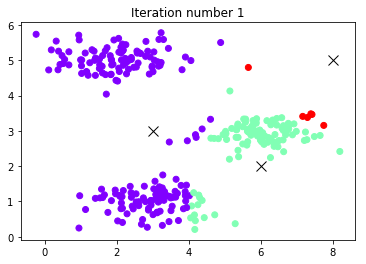

K-Means iteration 2/10


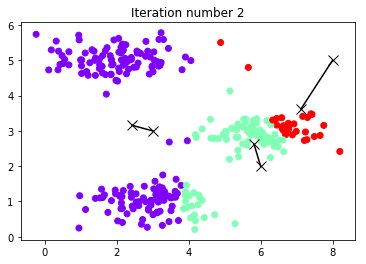

K-Means iteration 3/10


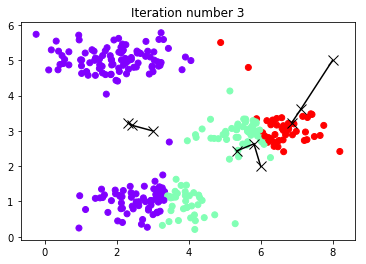

K-Means iteration 4/10


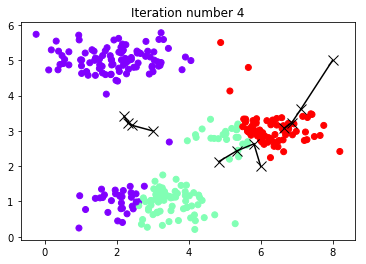

K-Means iteration 5/10


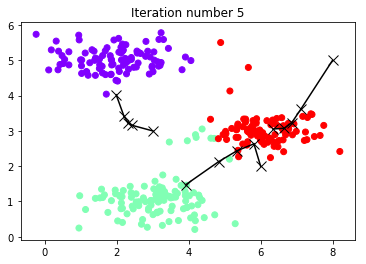

K-Means iteration 6/10


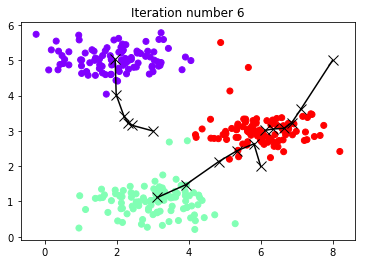

K-Means iteration 7/10


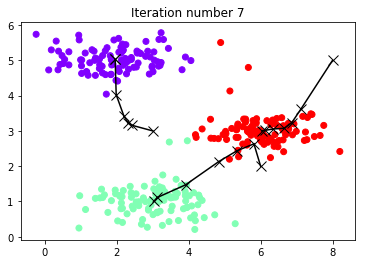

K-Means iteration 8/10


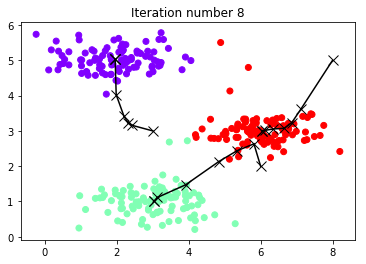

K-Means iteration 9/10


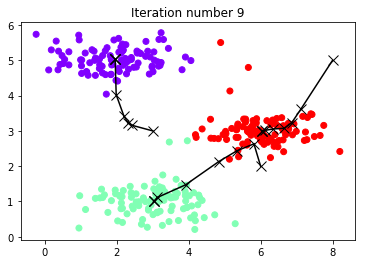

K-Means iteration 10/10


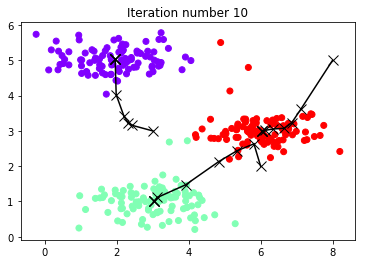

K-Means Done.


In [26]:
print('Running K-Means clustering on example dataset...')

# Load an example dataset
mat_data = sio.loadmat('ex7/ex7data2.mat')
X = mat_data['X']

# Settings for running K-Means
K = 3
max_iters = 10

# For consistency, here we set centroids to specific values but in practice you want to generate them automatically,
# such as by settings them to be random examples (as can be seen in k_means_init_centroids).
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Run K-Means algorithm
centroids, idx = run_k_means(X, initial_centroids, max_iters, True)
print('K-Means Done.')


In [29]:
import numpy as np


def k_means_init_centroids(X, K):
    """
    Initializes K centroids that are to be used in K-Means on the dataset X.
    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.
    K : int
        The number of centroids.
    Returns
    -------
    centroids : ndarray, shape (K, n_features)
        Randomly initialized centroids, each row of which is the mean of the data points assigned to it.
    """
    rand_idx = np.random.permutation(X.shape[0])
    centroids = X[rand_idx[0:K], :]
    return centroids

In [31]:
# ============= Part 4: K-Means Clustering on Pixels ===============
print('Running K-Means clustering on pixels from an image.')

# Load an image of a bird
A = imread('ex7/bird_small.png')
print(A.shape)
A = A.astype(float)/255

# Size of the image
img_size = A.shape

# Reshape the image into an Nx3 matrix where N = number of pixels.
X = A.reshape([img_size[0] * img_size[1], img_size[2]])

K = 16
max_iters = 10

# When using K-Means, it is important the initialize the centroids randomly.
initial_centroids = k_means_init_centroids(X, K)

# Run K-Means
centroids, idx = run_k_means(X, initial_centroids, max_iters)

Running K-Means clustering on pixels from an image.
(128, 128, 3)
K-Means iteration 1/10
K-Means iteration 2/10


/home/Ankit/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration 9/10
K-Means iteration 10/10


Applying K-Means to compress an image.


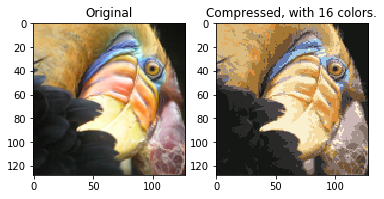

In [33]:
# ================= Part 5: Image Compression ======================
print('Applying K-Means to compress an image.')
idx = find_closest_centroids(X, centroids)

# Recover the image from the indices (idx) by mapping each pixel (specified by its index in idx) to the centroid value.
X_recovered = centroids[idx.astype(int), :]

# Reshape the recovered image into proper dimensions
X_recovered = X_recovered.reshape(img_size)

fig = plt.figure()
# Display the original image
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(A)
ax1.set_title('Original')
# Display compressed image side by side
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(X_recovered)
ax2.set_title('Compressed, with {} colors.'.format(K))
plt.show()